In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regression as reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("apy.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
def plot(df):
    x = df['Area']
    y = df['Production']
    plt.scatter(x,y)
    plt.xlabel('Area')
    plt.ylabel('Production')

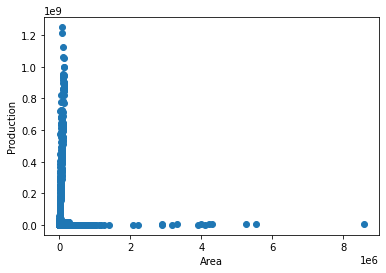

In [4]:
plot(data)

In [5]:
df = data.drop(columns={'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'}, axis=1)
df.dropna()
df.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [6]:
df.max()

Area          8.580100e+06
Production    1.250800e+09
dtype: float64

In [7]:
df.min()

Area          0.04
Production    0.00
dtype: float64

In [8]:
df2 = (df-df.min())/(df.max()-df.min())
df3 = (df-df.mean())/df.std()

In [9]:
df2.head()

,Area,Production
0,1.461475e-04,1.598977e-06
1,2.284356e-07,7.994883e-10
2,1.188331e-05,2.566358e-07
3,2.050792e-05,5.124720e-07
4,8.391044e-05,1.319156e-07


In [10]:
df3.head()

,Area,Production
0,-0.212749,-0.034016
1,-0.237530,-0.034133
2,-0.235551,-0.034114
3,-0.234086,-0.034095
4,-0.223319,-0.034123


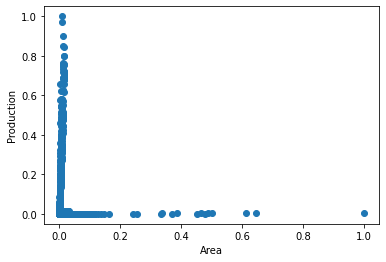

In [11]:
plot(df2)

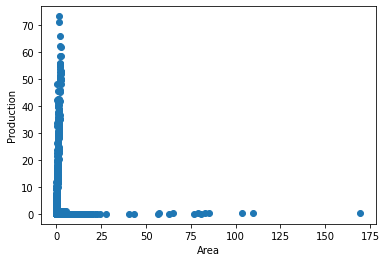

In [12]:
plot(df3)

A = 419425.94077255286 
B = 13.586597961447126
Mean Squared Error = 7.046912957494329e+19


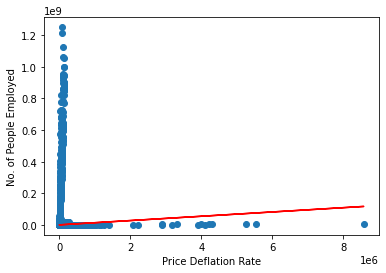

In [13]:
x1 = df['Area']
y1 = df['Production']
c1 = reg.getCoeff(x1,y1)
reg.calcLine(x1,y1,c1)

In [14]:
df.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [15]:
df.shape

(246091, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Area        246091 non-null  float64
 1   Production  242361 non-null  float64
dtypes: float64(2)
memory usage: 3.8 MB


In [17]:
df.isnull().sum()

Area             0
Production    3730
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Area          0
Production    0
dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df['Area'], df['Production'])

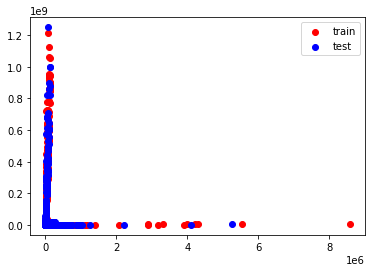

In [21]:
plt.scatter(x_train,y_train, label='train', color='r')
plt.scatter(x_test,y_test, label='test', color='b')
plt.legend()

In [22]:
x_train.values.reshape(-1,1)

array([[1.17900e+03],
       [6.67000e+04],
       [9.80000e+01],
       ...,
       [1.48608e+05],
       [2.03200e+03],
       [1.01000e+04]])

In [23]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [24]:
pred = lr.predict(x_test.values.reshape(-1,1))

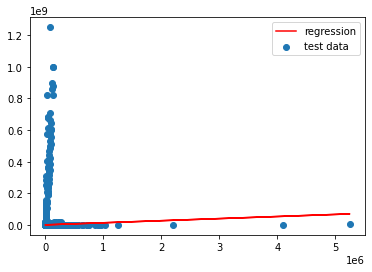

In [25]:
plt.plot(x_test,pred, label='regression', color='r')
plt.scatter(x_test,y_test, label='test data')
plt.legend()

In [26]:
lr.score(x_test.values.reshape(-1,1),y_test)

0.0017228530054834712

In [27]:
df4 = df[df['Area'] < 1e+05]

In [28]:
df4

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0
...,...,...
246085,325.0,2039.0
246086,306.0,801.0
246087,627.0,463.0
246088,324.0,16250.0


<AxesSubplot:xlabel='Area', ylabel='Production'>

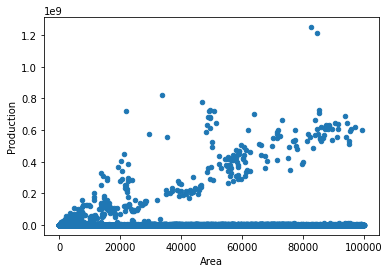

In [29]:
df4.plot(kind='scatter',x='Area', y='Production')

0.012409295426346723

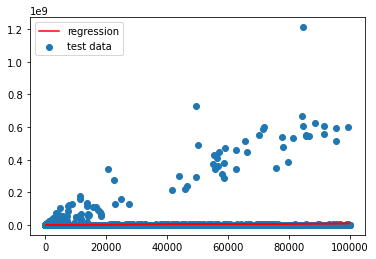

In [30]:
reg.skRegression(df4,'Area','Production')

In [31]:
lr.score(x_test.values.reshape(-1,1),y_test)

0.0017228530054834712

In [32]:
df.describe()

,Area,Production
count,2.423610e+05,2.423610e+05
mean,1.216741e+04,5.825034e+05
std,5.085744e+04,1.706581e+07
min,1.000000e-01,0.000000e+00
25%,8.700000e+01,8.800000e+01
50%,6.030000e+02,7.290000e+02
75%,4.545000e+03,7.023000e+03
max,8.580100e+06,1.250800e+09


In [33]:
df5 = df[df['Production'] > 0.021e+09]
df5 = df5[df5['Area'] < 1e+06]
df5.corr()

,Area,Production
Area,1.000000,0.912851
Production,0.912851,1.000000


<AxesSubplot:xlabel='Area', ylabel='Production'>

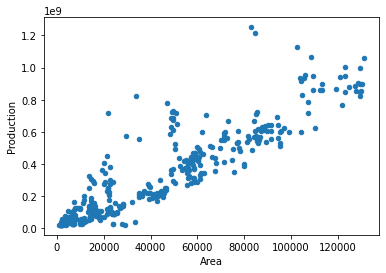

In [34]:
df5.plot(kind='scatter',x='Area', y='Production')

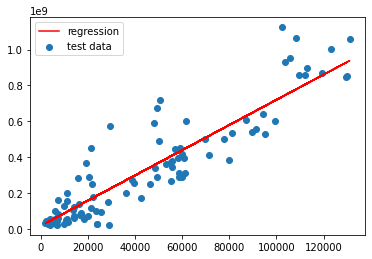

In [35]:
sc = reg.skRegression(df5, 'Area','Production')

In [36]:
print(sc)

0.8471439239375045
